# Wine Quality Predictions: Machine Learning

### @athors: Martín Blázquez Moreno & Juan Rafael Caro Romero

## [Click to see Wine-Quality Dataset & Information](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

In [1]:
# LIBRARIES

from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.cluster import DBSCAN
from sklearn import svm
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# CSV IMPORT
wqred = pd.read_csv('/home/master/machine learning/Homework 2/winequality-red.csv', delimiter = ';')
wqwhite = pd.read_csv('/home/master/machine learning/Homework 2/winequality-white.csv', delimiter = ';')

In [4]:
# Show number of rows and columns
print("Red wine dimension: " + str(wqred.shape))
print("White wine dimension: " + str(wqwhite.shape))

Red wine dimension: (1599, 12)
White wine dimension: (4898, 12)


In [5]:
# Show multiple samples from the dataset (RED WINE)
wqred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# (WHITE WINE)
wqwhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Both data sets are made up of the same number of columns.
###### The characteristics of both data sets appear to be similar. It would be interesting to analyze these data sets [separately] and [together].

# CLASSIFIER MODELS

Assuming that the rating of a wine can be seen as classes (10 classes, 1 class for each score), we are going to use classifier models to see if they are able to correctly rate a wine.

We have two different data sets, one for white wines and one for red wines. The data set for white wines is far superior to the data set for red wine.

We are going to check if the more data the models adapt better.

Let's start with the smallest data set.

# Red wine Analysis

In [7]:
X = wqred.loc[:,'fixed acidity':'alcohol']
print("Dimension X-matrix" + str(X.shape))
X.head()

Dimension X-matrix(1599, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
y = wqred.loc[:,'quality']
print("Dimension y-label: " + str(y.shape))
y.head()

Dimension y-label: (1599,)


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [9]:
#split the data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

#and show the distribution of the differents labels
print()
for i in range(10):
    print(i, " ",sum(y_train==i)/y_train.shape[0]*100)


0   0.0
1   0.0
2   0.0
3   0.6254886630179828
4   3.2838154808444098
5   42.61141516810008
6   39.87490226739641
7   12.43158717748241
8   1.1727912431587177
9   0.0


It is observed that some wine scores are not used. For example: 0, 1, 2, 9 & 10.
It is also observed that the frequencies are not linearly distributed.

The next step is to scaling the data before the process of decreasing the dimensionality of the dataset. This method is named as Principal Component Analysis (PCA). This process may reduce the accuracy of the model due to you need to convert some features.

In [10]:
#Scalling the data
miStdScaler = StandardScaler() 
X_train = miStdScaler.fit_transform(X_train) #overwrite X_train with the new features
X_test = miStdScaler.transform(X_test) #overwrite X_test with the new features

In [11]:
def plot_lossPCA(dataTr, dataT):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Variance')
    ax.set_xlabel('Decreasing dimension')
    for i in range (dataTr.shape[1]):
        miPCA = PCA(n_components=i)
        miPCA.fit(dataTr)
        dataTr_pca = miPCA.transform(dataTr)
        dataT_pca = miPCA.transform(dataT)
        ax.bar(i,sum(miPCA.explained_variance_ratio_),color='g')
    plt.show()

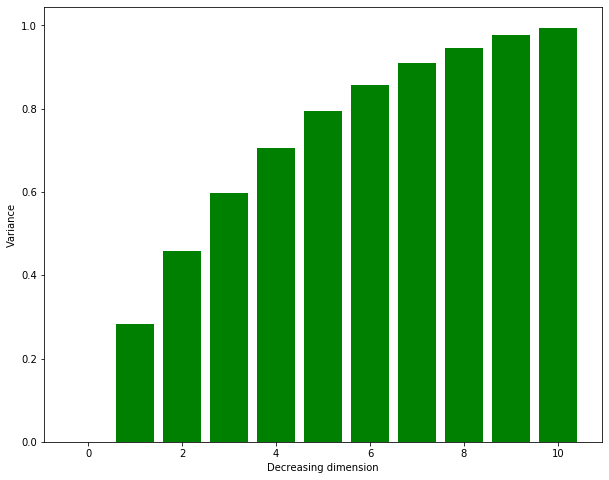

In [12]:
plot_lossPCA(X_train, X_test)

Exist a parameter in the random forest model which tell us the importance of each feature in the dataset. With this parameter we can select the right number of components in the PCA.

In [13]:
def modRF(ytest, ytrain, xtest, xtrain):   
    miModelo = RandomForestClassifier()    
    migrid = {'n_estimators':[10,30,50,100]}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(xtrain,ytrain)
    midtopt = migscv.best_estimator_
    midtopt.fit(xtrain,ytrain)
    y_pred = midtopt.predict(X_test)    
    print('Random Forest Model accuracy:',100*accuracy_score(y_test,y_pred))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
        
    return t,midtopt

In [14]:
(t,rf) = modRF(y_test,y_train, X_test, X_train)

Random Forest Model accuracy: 72.8125


Sum every feature: 1.0

0 -> 0.07510801319666655
1 -> 0.10507217932851315
2 -> 0.07258072998731928
3 -> 0.07602354447466589
4 -> 0.08254774799775007
5 -> 0.06716904630305773
6 -> 0.10640733703382914
7 -> 0.09788580845054742
8 -> 0.07471853304182804
9 -> 0.10812945127287418
10 -> 0.13435760891294854


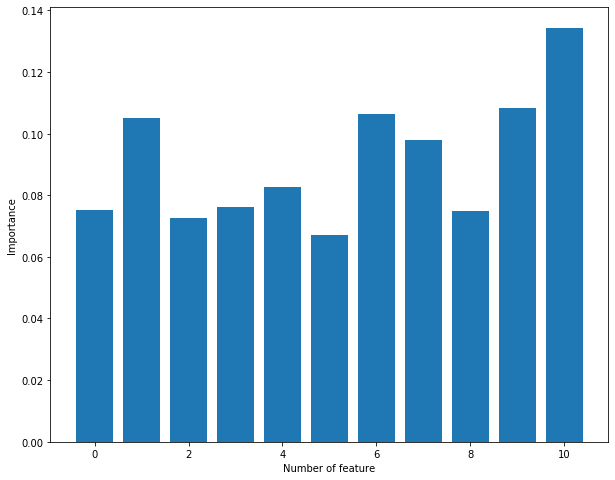

In [16]:
print("Sum every feature: "+str(sum(rf.feature_importances_)))
print()
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(np.arange(11),rf.feature_importances_)
ax.set_ylabel('Importance')
ax.set_xlabel("Number of feature")


for i in range(11):
    print(str(i) + " -> " + str(rf.feature_importances_[i]))

In this case, since there are few columns, it seems that there are no columns that stand out as irrelevant.

But in the green graph above, you can see that the variance does not vary much if we reduce the features to 4-5.

## Analysis with KNN Models (Red wine)

In [39]:
def modKNN(n,grid,ytest,ytrain,xtest,xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    
    mimod = KNeighborsClassifier()
    migscv = GridSearchCV(estimator=mimod,param_grid=grid,scoring='accuracy',cv=10,n_jobs=-1) #10-fold
    migscv.fit(X_train_pca,ytrain)
    miknnopt = migscv.best_estimator_
    miknnopt.fit(X_train_pca,ytrain)
    y_pred = miknnopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    if(len(grid)>=3):
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,'/',miknnopt.metric,') with n_components: ',n)
    else:
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,') with n_components: ',n)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Accuracy: 53.75 KNN ( 9 / uniform ) with n_components:  2
Accuracy: 59.68750000000001 KNN ( 5 / uniform ) with n_components:  4
Accuracy: 56.25 KNN ( 9 / uniform ) with n_components:  6
Accuracy: 57.49999999999999 KNN ( 5 / uniform ) with n_components:  8


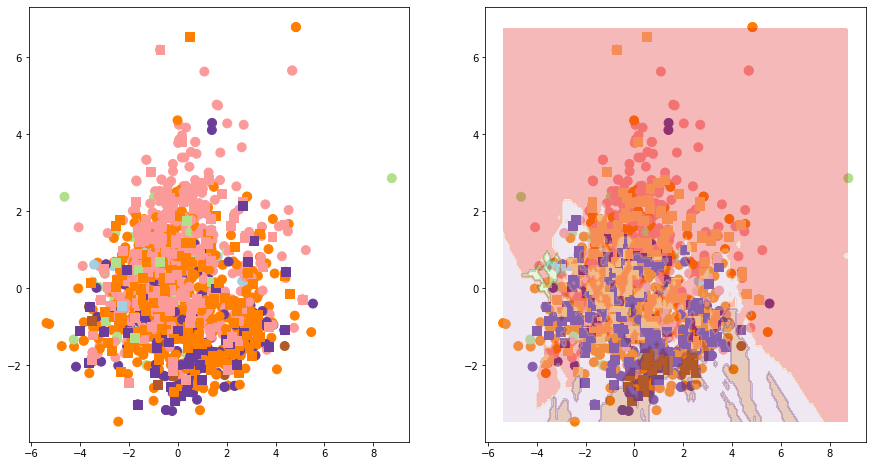

In [42]:
# CV with differents n_neighbors parameters & weight: uniform
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['uniform']}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

dataT = {'Dimensions': [2,4,6,8], 'KNN uniform': time_grid}
dataA = {'Dimensions': [2,4,6,8], 'KNN uniform': acc}

df_time = pd.DataFrame(dataT)
df_accuracy = pd.DataFrame(dataA)

Accuracy: 61.25000000000001 KNN ( 9 / distance ) with n_components:  2
Accuracy: 68.75 KNN ( 9 / distance ) with n_components:  4
Accuracy: 65.9375 KNN ( 9 / distance ) with n_components:  6
Accuracy: 67.1875 KNN ( 9 / distance ) with n_components:  8


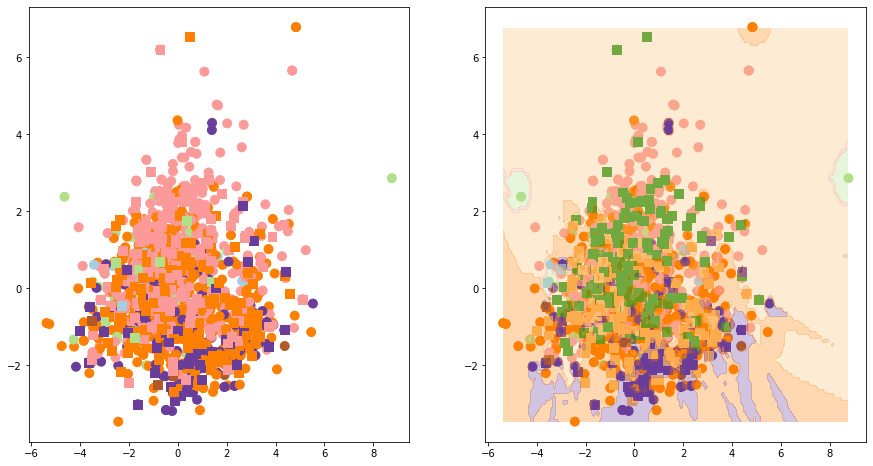

In [43]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['distance']}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

df_time['KNN distance'] = time_grid
df_accuracy['KNN distance'] = acc

The parameter 'distance' seems be better than 'uniform'.
We try the same, but changing the parameter 'metrics'.

Accuracy: 60.0 KNN ( 9 / distance / manhattan ) with n_components:  2
Accuracy: 68.4375 KNN ( 9 / distance / manhattan ) with n_components:  4
Accuracy: 65.3125 KNN ( 9 / distance / minkowski ) with n_components:  6
Accuracy: 68.75 KNN ( 9 / distance / minkowski ) with n_components:  8


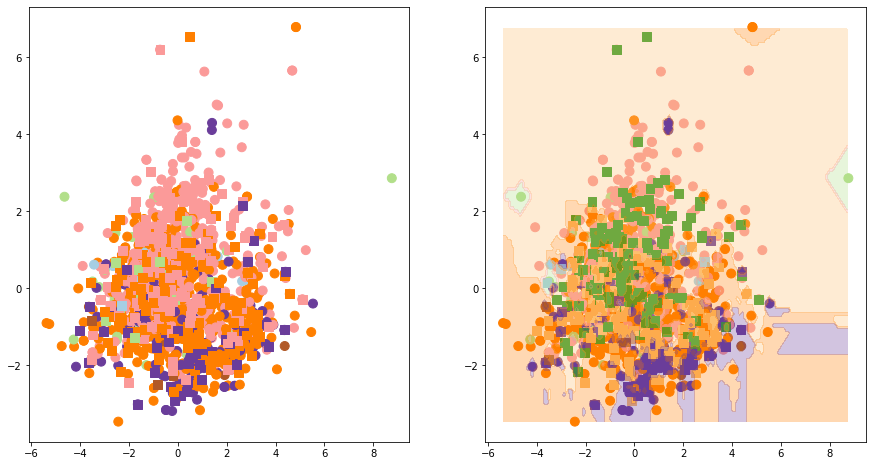

In [44]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['uniform','distance'], 'metric':\
          ['manhattan','euclidean','chebyshev','minkowski'], 'p':[2,3,4,5,6]}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

df_time['KNN metric'] = time_grid
df_accuracy['KNN metric'] = acc

The accuracy is similar to above.

#### We will try the same but we change the CV value:

In [46]:
def modKNN(n,grid,ytest,ytrain,xtest,xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    
    mimod = KNeighborsClassifier()
    migscv = GridSearchCV(estimator=mimod,param_grid=grid,scoring='accuracy',cv=100,n_jobs=-1) #10-fold
    migscv.fit(X_train_pca,ytrain)
    miknnopt = migscv.best_estimator_
    miknnopt.fit(X_train_pca,ytrain)
    y_pred = miknnopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    if(len(grid)>=3):
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,'/',miknnopt.metric,') with n_components: ',n)
    else:
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,') with n_components: ',n)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

In this case, we will try the last method, because in there we used many parameters.

Accuracy: 59.375 KNN ( 7 / distance / manhattan ) with n_components:  2
Accuracy: 67.1875 KNN ( 5 / distance / chebyshev ) with n_components:  4
Accuracy: 65.9375 KNN ( 9 / distance / euclidean ) with n_components:  6
Accuracy: 66.5625 KNN ( 9 / distance / chebyshev ) with n_components:  8


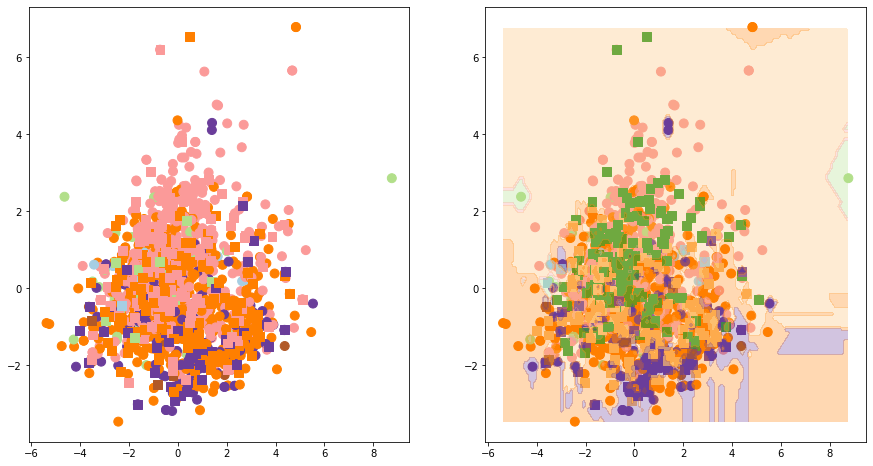

In [47]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['uniform','distance'], 'metric':\
          ['manhattan','euclidean','chebyshev','minkowski'], 'p':[2,3,4,5,6]}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

df_time['KNN metric'] = time_grid
df_accuracy['KNN metric'] = acc

We dont seea great improvement.

## Naive-bayes model

In [48]:
#Define the NV-model
def modbayes(ytest,ytrain,xtest,xtrain):
    mignb = GaussianNB()
    mignb.fit(xtrain,ytrain)
    y_pred = mignb.predict(xtest)  
    print('Naive Bayes Model accuracy:',100*accuracy_score(ytest,y_pred))

In [49]:
modbayes(y_test,y_train, X_test, X_train)

Naive Bayes Model accuracy: 55.3125


## Decision tree model

In [50]:
def modtree(n,ytest,ytrain,xtest,xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    
    mimod = DecisionTreeClassifier()
    migrid = {'max_depth':[3,5,7,9]}
    migscv = GridSearchCV(estimator=mimod,param_grid=migrid,scoring='accuracy',cv=10, n_jobs=-1)
    migscv.fit(X_train_pca,ytrain)
    miknnopt = migscv.best_estimator_
    miknnopt.fit(X_train_pca,ytrain)
    y_pred = miknnopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    print(test_acc, 'Decision Tree Model with n_components: ',n)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

50.9375 Decision Tree Model with n_components:  2
56.875 Decision Tree Model with n_components:  4
58.75 Decision Tree Model with n_components:  6
56.25 Decision Tree Model with n_components:  8


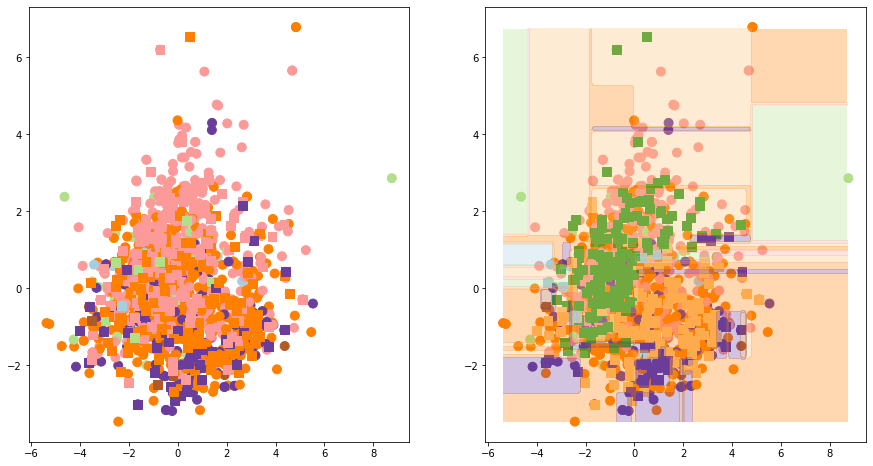

In [51]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modtree(v,y_test,y_train, X_test, X_train)

df_time['Decision Tree'] = time_grid
df_accuracy['Decision Tree'] = acc

## Support vector machine model

In [52]:
def modSVC(n,ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    miModelo = SVC()
    migrid = {'C': np.logspace(-2, 4, 7), 'gamma': np.logspace(-4, 4, 9)}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(X_train_pca,y_train)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,ytrain)
    y_pred = midtopt.predict(X_test_pca)  
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    print('SVC Model accuracy: ' + str(test_acc) + ' / ' + str(n))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

SVC Model accuracy: 58.12500000000001 / 2
SVC Model accuracy: 66.25 / 4
SVC Model accuracy: 62.81250000000001 / 6
SVC Model accuracy: 65.0 / 8


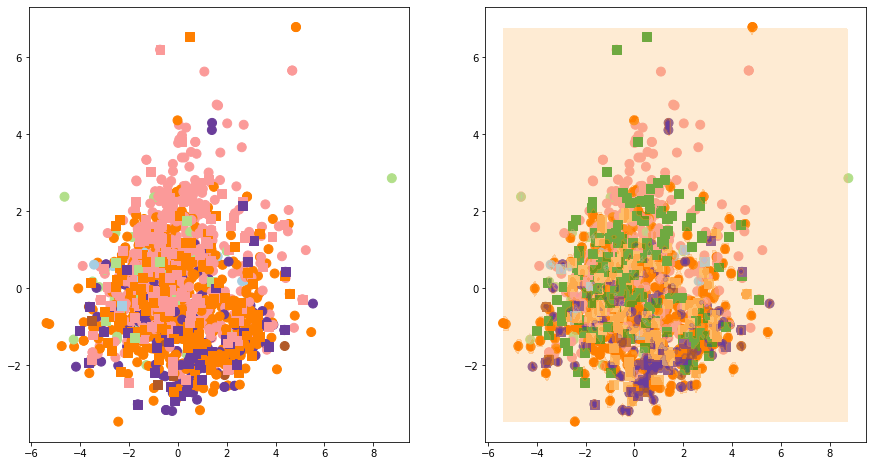

In [53]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modSVC(v,y_test,y_train, X_test, X_train)

df_time['SVC'] = time_grid
df_accuracy['SVC'] = acc

## Neural network model

In [58]:
def neuralnetwork (n, ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    
    miNN = MLPClassifier()
    
    #You can try some differents value/struct for the neural network model:
    migrid = {'hidden_layer_sizes':[(12,8,5),(10,6,2),(5,3,3),(5,5)],
              'activation': ['logistic', 'tanh']} 
    
    migscv = GridSearchCV(estimator=miNN,param_grid=migrid,scoring='accuracy',cv=10, n_jobs=4)
    migscv.fit(X_train_pca,ytrain)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,ytrain)    
    y_pred = midtopt.predict(X_test_pca)  
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    print('Neural Network accuracy: ' + str(test_acc) + ' / ' + str(n))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t, test_acc

Neural Network accuracy: 52.1875 / 2
Neural Network accuracy: 57.49999999999999 / 4
Neural Network accuracy: 60.62499999999999 / 6
Neural Network accuracy: 60.62499999999999 / 8


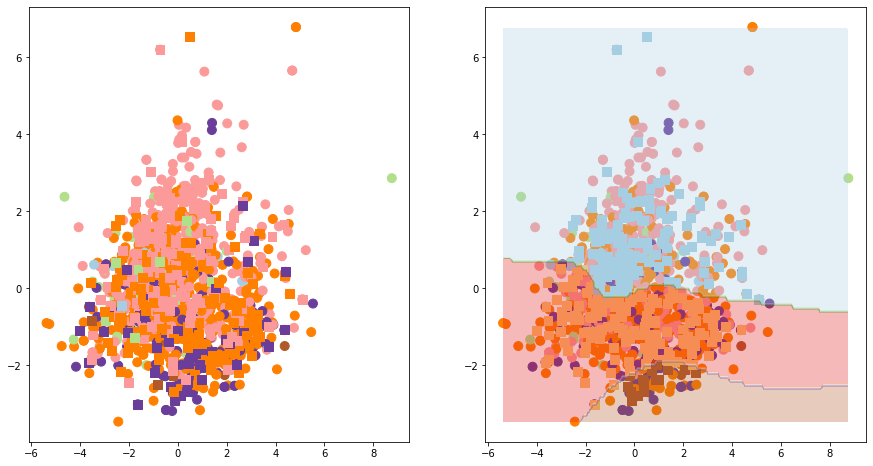

In [59]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = neuralnetwork(v,y_test,y_train, X_test, X_train)

df_time['ANN'] = time_grid
df_accuracy['ANN'] = acc

The neural network is too complex a model to solve this type of problem. Since an overfitting can be produced very easily.

## AdaBoost model

In [60]:
def ADABoost(n, ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    miModelo = AdaBoostClassifier()    
    migrid = {'n_estimators':[10,30,50,100]}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(X_train_pca,ytrain)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,ytrain)
    y_pred = midtopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    print("Accuracy " + str(test_acc) + " / " + str(n))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Accuracy 53.43750000000001 / 2
Accuracy 52.5 / 4
Accuracy 52.5 / 6
Accuracy 52.5 / 8


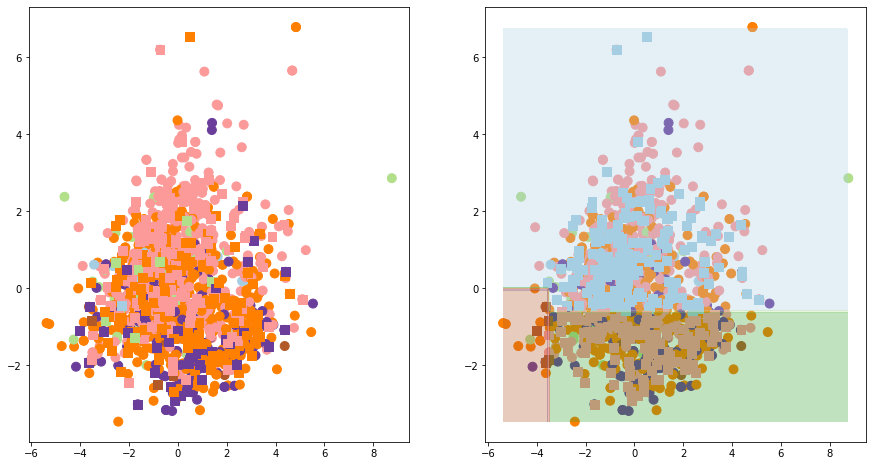

In [61]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = ADABoost(v,y_test,y_train, X_test, X_train)

df_time['ADA'] = time_grid
df_accuracy['ADA'] = acc

## RandomForest model

In [62]:
def modRF_PCA(n, ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    
    miModelo = RandomForestClassifier()    
    migrid = {'n_estimators':[10,30,50,100]}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(X_train_pca,y_train)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,y_train)
    y_pred = midtopt.predict(X_test_pca)    
    
    test_acc = 100*accuracy_score(y_test,y_pred)
    
    print('Random Forest Model accuracy:',test_acc)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Random Forest Model accuracy: 60.0
Random Forest Model accuracy: 65.0
Random Forest Model accuracy: 69.375
Random Forest Model accuracy: 70.625


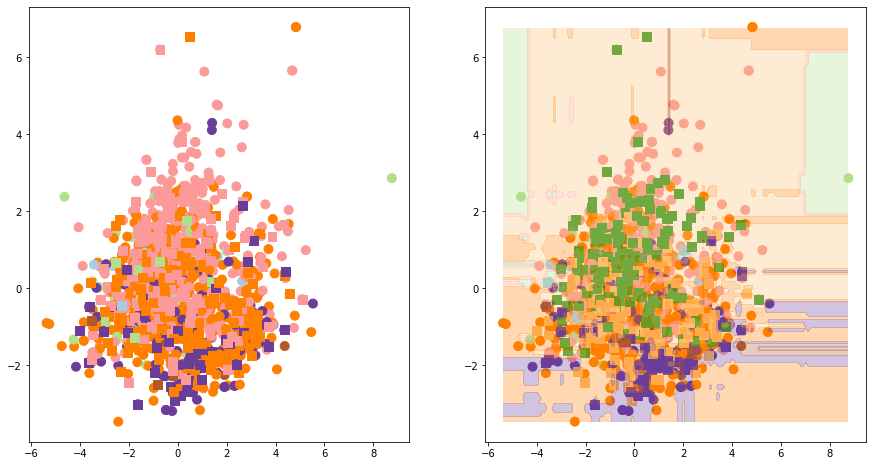

In [63]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modRF_PCA(v,y_test,y_train, X_test, X_train)

df_time['RDF'] = time_grid
df_accuracy['RDF'] = acc

### Conclusion
As the importance of the variables is similar, when the PCA method is performed (n_components = 2 to be able to represent it) it is observed that the accuracy of the models does not exceed 65%. So are they poor models? The answer is it DEPENDS.
It depends on the application or intended use of the model.

# White Wine Analysis
## (classifier)

We will repeat exactly the same with the white wine dataset.

In [65]:
X = wqwhite.loc[:,'fixed acidity':'alcohol']
print("Dimension X-matrix" + str(X.shape))
X.head()

Dimension X-matrix(4898, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [66]:
y = wqwhite.loc[:,'quality']
print("Dimension y-label: " + str(y.shape))
y.head()

Dimension y-label: (4898,)


0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

This data set is bigger than the red wine data set.

In [67]:
#split the data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

#and show the distribution of the differents labels
print()
for i in range(10):
    print(i, " ",sum(y_train==i)/y_train.shape[0]*100)


0   0.0
1   0.0
2   0.0
3   0.40837161817253703
4   3.3180193976518635
5   29.760081674323636
6   44.86983154670751
7   17.968351199591627
8   3.573251659009699
9   0.10209290454313426


The labels are not linearly distributed.

In [68]:
#Scalling the data
miStdScaler = StandardScaler() 
X_train = miStdScaler.fit_transform(X_train) #overwrite X_train with the new features
X_test = miStdScaler.transform(X_test) #overwrite X_test with the new features

In [69]:
def plot_lossPCA(dataTr, dataT):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Variance')
    ax.set_xlabel('Decreasing dimension')
    for i in range (dataTr.shape[1]):
        miPCA = PCA(n_components=i)
        miPCA.fit(dataTr)
        dataTr_pca = miPCA.transform(dataTr)
        dataT_pca = miPCA.transform(dataT)
        ax.bar(i,sum(miPCA.explained_variance_ratio_),color='g')
    plt.show()

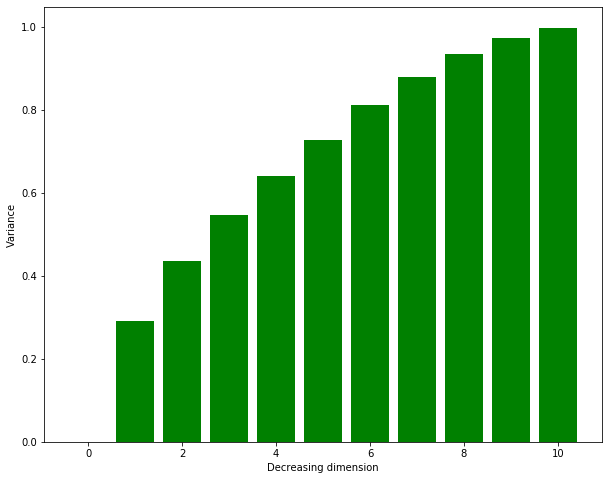

In [70]:
plot_lossPCA(X_train, X_test)

You can see that the variance loss curve decreases rapidly.

To know the relevance of the labels, a code from the random forest model will be used. 

In [71]:
def modRF(ytest, ytrain, xtest, xtrain):   
    miModelo = RandomForestClassifier()    
    migrid = {'n_estimators':[10,30,50,100]}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(xtrain,ytrain)
    midtopt = migscv.best_estimator_
    midtopt.fit(xtrain,ytrain)
    y_pred = midtopt.predict(X_test)    
    print('Random Forest Model accuracy:',100*accuracy_score(y_test,y_pred))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
        
    return t,midtopt

In [72]:
(t,rf) = modRF(y_test,y_train, X_test, X_train)

Random Forest Model accuracy: 67.85714285714286


Sum every feature: 1.0

0 -> 0.07467827793981743
1 -> 0.09978287554065891
2 -> 0.08338659981352933
3 -> 0.0875484813194222
4 -> 0.0850348370300244
5 -> 0.09470171820243153
6 -> 0.0911369683852922
7 -> 0.10234849300059944
8 -> 0.08577595720495002
9 -> 0.08106326324835145
10 -> 0.11454252831492319


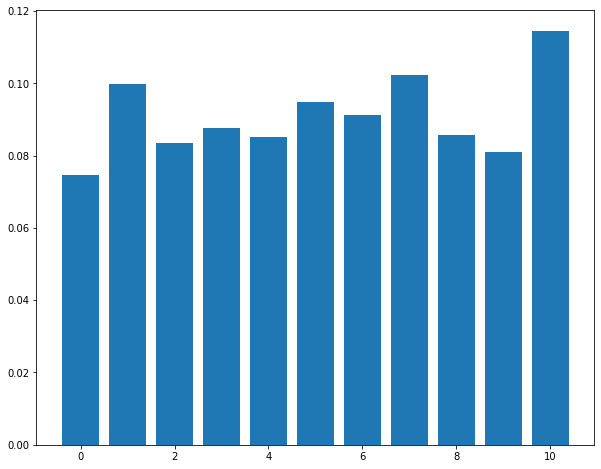

In [73]:
print("Sum every feature: "+str(sum(rf.feature_importances_)))
print()
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(np.arange(11),rf.feature_importances_)

for i in range(11):
    print(str(i) + " -> " + str(rf.feature_importances_[i]))

In this case, we can't dismiss a feature easily.

## Analysis with KNN Models (White wine)

In [74]:
def modKNN(n,grid,ytest,ytrain,xtest,xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    
    mimod = KNeighborsClassifier()
    migscv = GridSearchCV(estimator=mimod,param_grid=grid,scoring='accuracy',cv=10,n_jobs=-1) #10-fold
    migscv.fit(X_train_pca,ytrain)
    miknnopt = migscv.best_estimator_
    miknnopt.fit(X_train_pca,ytrain)
    y_pred = miknnopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    if(len(grid)>=3):
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,'/',miknnopt.metric,') with n_components: ',n)
    else:
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,') with n_components: ',n)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Accuracy: 46.224489795918366 KNN ( 5 / uniform ) with n_components:  2
Accuracy: 54.18367346938775 KNN ( 7 / uniform ) with n_components:  4
Accuracy: 56.93877551020409 KNN ( 5 / uniform ) with n_components:  6
Accuracy: 55.10204081632652 KNN ( 5 / uniform ) with n_components:  8


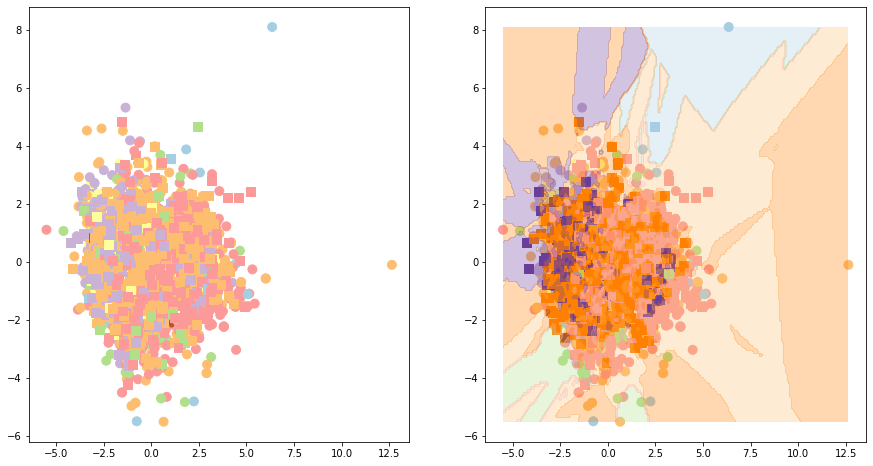

In [75]:
# CV with differents n_neighbors parameters & weight: uniform
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['uniform']}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

dataT = {'Dimensions': [2,4,6,8], 'KNN uniform': time_grid}
dataA = {'Dimensions': [2,4,6,8], 'KNN uniform': acc}

df_time = pd.DataFrame(dataT)
df_accuracy = pd.DataFrame(dataA)

Accuracy: 57.6530612244898 KNN ( 9 / distance ) with n_components:  2
Accuracy: 64.28571428571429 KNN ( 9 / distance ) with n_components:  4
Accuracy: 64.28571428571429 KNN ( 9 / distance ) with n_components:  6
Accuracy: 64.38775510204081 KNN ( 9 / distance ) with n_components:  8


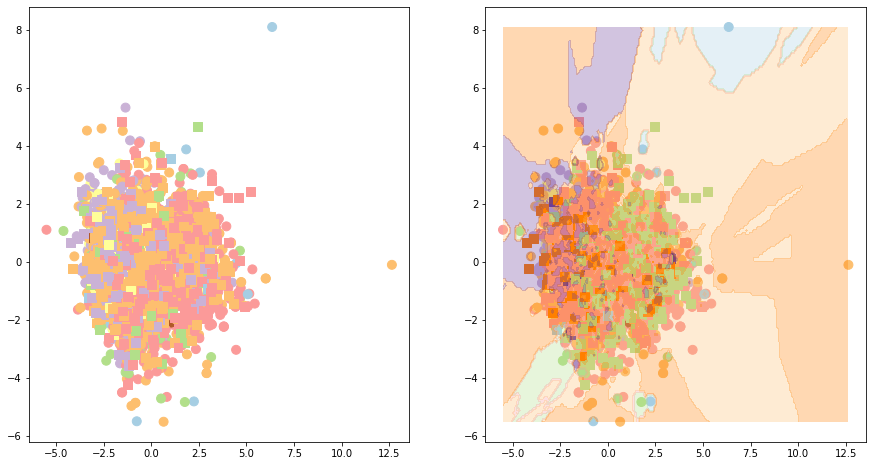

In [76]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['distance']}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

df_time['KNN distance'] = time_grid
df_accuracy['KNN distance'] = acc

In [77]:
def modKNN(n,grid,ytest,ytrain,xtest,xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    
    mimod = KNeighborsClassifier()
    migscv = GridSearchCV(estimator=mimod,param_grid=grid,scoring='accuracy',cv=100,n_jobs=-1) #10-fold
    migscv.fit(X_train_pca,ytrain)
    miknnopt = migscv.best_estimator_
    miknnopt.fit(X_train_pca,ytrain)
    y_pred = miknnopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    if(len(grid)>=3):
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,'/',miknnopt.metric,') with n_components: ',n)
    else:
        print("Accuracy:",test_acc, \
          'KNN (',miknnopt.n_neighbors,'/',miknnopt.weights,') with n_components: ',n)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Accuracy: 57.75510204081633 KNN ( 9 / distance / chebyshev ) with n_components:  2
Accuracy: 64.08163265306122 KNN ( 9 / distance / chebyshev ) with n_components:  4
Accuracy: 66.3265306122449 KNN ( 9 / distance / chebyshev ) with n_components:  6
Accuracy: 62.755102040816325 KNN ( 9 / distance / manhattan ) with n_components:  8


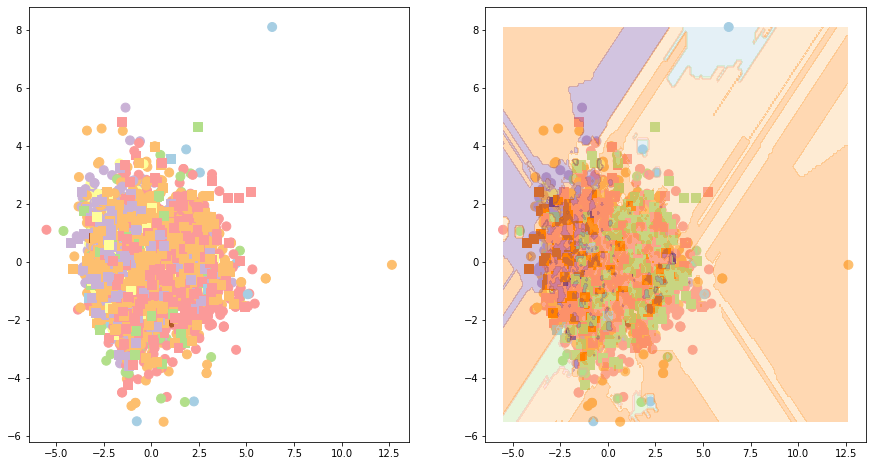

In [78]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

migrid = {'n_neighbors':[3,5,7,9],'weights':['uniform','distance'], 'metric':\
          ['manhattan','euclidean','chebyshev','minkowski'], 'p':[2,3,4,5,6]}

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modKNN(v,migrid,y_test,y_train, X_test, X_train)

df_time['KNN metric'] = time_grid
df_accuracy['KNN metric'] = acc

## Naive-bayes model

In [79]:
#Define the NV-model
def modbayes(ytest,ytrain,xtest,xtrain):
    mignb = GaussianNB()
    mignb.fit(xtrain,ytrain)
    y_pred = mignb.predict(xtest)  
    print('Naive Bayes Model accuracy:',100*accuracy_score(ytest,y_pred))

In [80]:
modbayes(y_test,y_train, X_test, X_train)

Naive Bayes Model accuracy: 42.55102040816327


## Decision tree model

In [81]:
def modtree(n,ytest,ytrain,xtest,xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    
    mimod = DecisionTreeClassifier()
    migrid = {'max_depth':[3,5,7,9]}
    migscv = GridSearchCV(estimator=mimod,param_grid=migrid,scoring='accuracy',cv=10, n_jobs=-1)
    migscv.fit(X_train_pca,ytrain)
    miknnopt = migscv.best_estimator_
    miknnopt.fit(X_train_pca,ytrain)
    y_pred = miknnopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    print(test_acc, 'Decision Tree Model with n_components: ',n)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

47.04081632653061 Decision Tree Model with n_components:  2
51.02040816326531 Decision Tree Model with n_components:  4
53.673469387755105 Decision Tree Model with n_components:  6
53.87755102040816 Decision Tree Model with n_components:  8


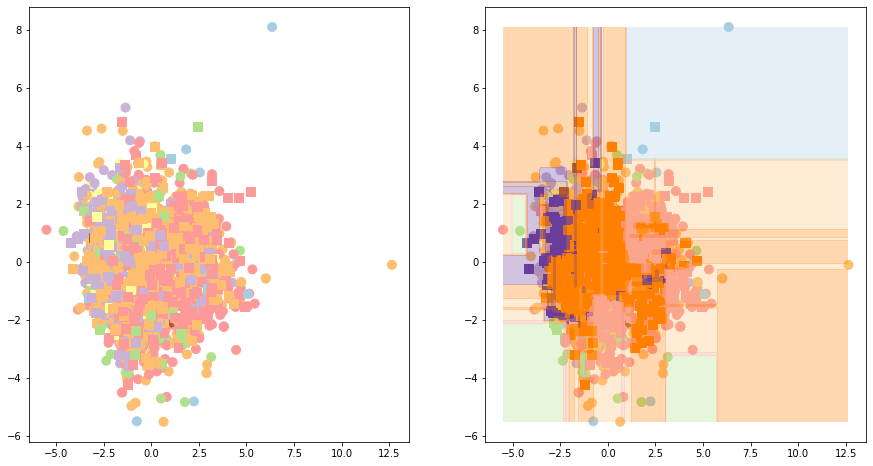

In [82]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modtree(v,y_test,y_train, X_test, X_train)

df_time['Decision Tree'] = time_grid
df_accuracy['Decision Tree'] = acc

## Support vector classifier model

In [83]:
def modSVC(n,ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    miModelo = SVC()
    migrid = {'C': np.logspace(-2, 4, 7), 'gamma': np.logspace(-4, 4, 9)}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(X_train_pca,y_train)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,ytrain)
    y_pred = midtopt.predict(X_test_pca)  
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    print('SVC Model accuracy: ' + str(test_acc) + ' / ' + str(n))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

The SVC model last so keep calm :D

In [86]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modSVC(v,y_test,y_train, X_test, X_train)

df_time['SVC'] = time_grid
df_accuracy['SVC'] = acc

## Neural network model

In [87]:
def neuralnetwork (n, ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    
    miNN = MLPClassifier()
    
    #You can try some differents value/struct for the neural network model:
    migrid = {'hidden_layer_sizes':[(12,8,5),(10,6,2),(5,3,3),(5,5)],
              'activation': ['logistic', 'tanh']} 
    
    migscv = GridSearchCV(estimator=miNN,param_grid=migrid,scoring='accuracy',cv=10, n_jobs=4)
    migscv.fit(X_train_pca,ytrain)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,ytrain)    
    y_pred = midtopt.predict(X_test_pca)  
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    print('Neural Network accuracy: ' + str(test_acc) + ' / ' + str(n))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t, test_acc

Neural Network accuracy: 45.51020408163266 / 2
Neural Network accuracy: 50.10204081632653 / 4
Neural Network accuracy: 54.285714285714285 / 6
Neural Network accuracy: 52.85714285714286 / 8


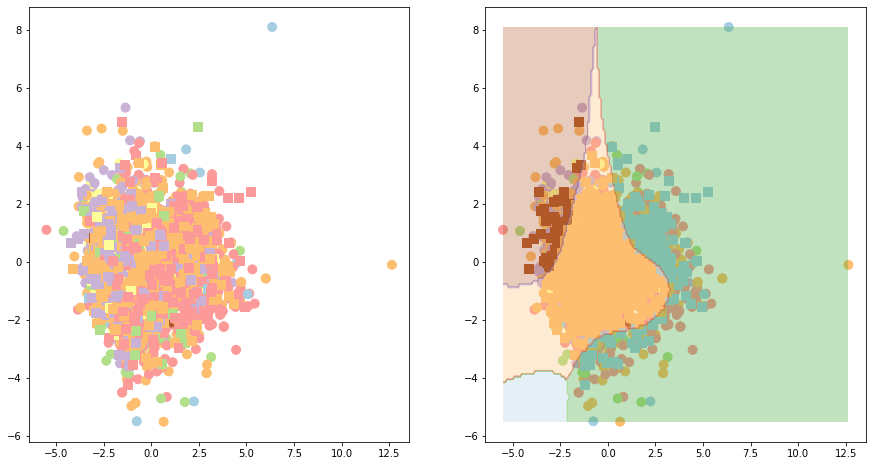

In [88]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = neuralnetwork(v,y_test,y_train, X_test, X_train)

df_time['ANN'] = time_grid
df_accuracy['ANN'] = acc

## AdaBoost model

In [89]:
def ADABoost(n, ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    miModelo = AdaBoostClassifier()    
    migrid = {'n_estimators':[10,30,50,100]}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(X_train_pca,ytrain)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,ytrain)
    y_pred = midtopt.predict(X_test_pca)
    
    test_acc = 100*accuracy_score(ytest,y_pred)
    
    print("Accuracy " + str(test_acc) + " / " + str(n))
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Accuracy 44.59183673469388 / 2
Accuracy 46.42857142857143 / 4
Accuracy 39.285714285714285 / 6
Accuracy 37.95918367346939 / 8


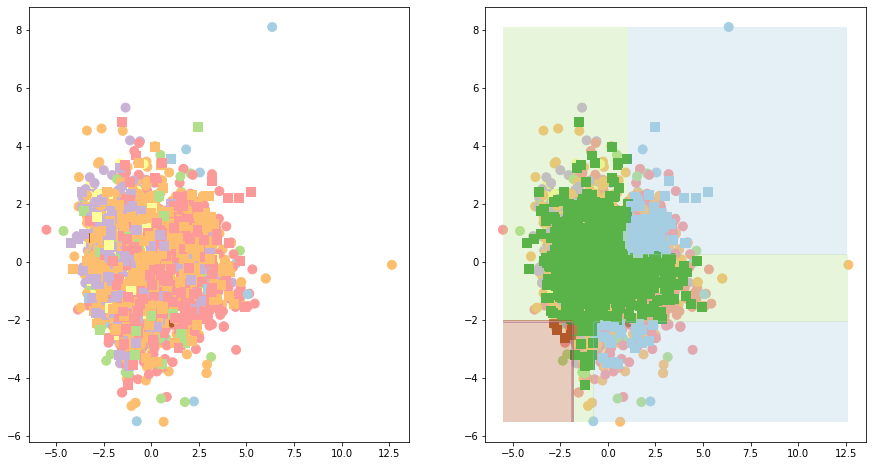

In [90]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = ADABoost(v,y_test,y_train, X_test, X_train)

df_time['ADA'] = time_grid
df_accuracy['ADA'] = acc

## Random forest model

In [91]:
def modRF_PCA(n, ytest, ytrain, xtest, xtrain):
    miPCA = PCA(n_components=n)
    miPCA.fit(xtrain)
    X_train_pca = miPCA.transform(xtrain)
    X_test_pca = miPCA.transform(xtest)
    
    miModelo = RandomForestClassifier()    
    migrid = {'n_estimators':[10,30,50,100]}
    migscv = GridSearchCV(estimator=miModelo,param_grid=migrid,scoring='accuracy',cv=10,n_jobs=-1)
    migscv.fit(X_train_pca,y_train)
    midtopt = migscv.best_estimator_
    midtopt.fit(X_train_pca,y_train)
    y_pred = midtopt.predict(X_test_pca)    
    
    test_acc = 100*accuracy_score(y_test,y_pred)
    
    print('Random Forest Model accuracy:',test_acc)
    
    t = sum(migscv.cv_results_['mean_score_time']) + sum(migscv.cv_results_['mean_fit_time'])
    
    if(n==2):
        plt.figure(figsize=(15, 8))
        plt.subplot(121)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        
        X_test_pca = miPCA.transform(xtest)
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=ytest,cmap='Paired')
        
        plt.subplot(122)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=ytrain,cmap='Paired')
        plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred,cmap='Paired')
        
        x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
        y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        Z = midtopt.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3,cmap='Paired')
        
    return t,test_acc

Random Forest Model accuracy: 57.75510204081633
Random Forest Model accuracy: 63.6734693877551
Random Forest Model accuracy: 66.42857142857143
Random Forest Model accuracy: 65.10204081632654


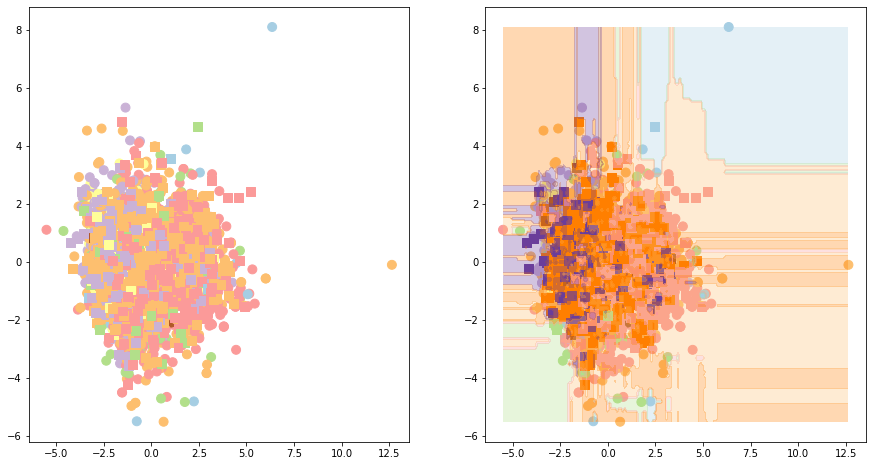

In [92]:
dimensions = [2, 4, 6, 8]
time_grid = np.zeros(len(dimensions))
acc = np.zeros(len(dimensions))

for i, v in enumerate(dimensions):
    time_grid[i], acc[i] = modRF_PCA(v,y_test,y_train, X_test, X_train)

df_time['RDF'] = time_grid
df_accuracy['RDF'] = acc

Definitely, having more data does not always mean that our model will be better.
These models are not very useful with these datasets, since the data of different labels are very close.

We will work now with REGRESSION MODELS. But in this case, only with the RED wine data set.

# Regression models
It is assumed that the rating of the wines being an interval from zero to 10, there are infinite possibilities to give a score. For this reason, regression models are carried out for the same purpose as classifier models.

Since the data sets are similar, only red wines will be analyzed.

In [96]:
X = wqred.loc[:,'fixed acidity':'alcohol']
print("Dimension X-matrix" + str(X.shape))
y = wqred.loc[:,'quality']
print("Dimension y-label: " + str(y.shape))

Dimension X-matrix(1599, 11)
Dimension y-label: (1599,)


## Vector support regression (SVR)

In [104]:
## from sklearn import svm

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify = y,test_size=0.2,random_state=6)

#Standardizing data
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.transform(X_test)

svm = svm.SVC()
migrid = GridSearchCV(svm, {'kernel':('linear', 'rbf'), 'C':[1, 10]})
migrid.fit(X_train, y_train)

accuracy = migrid.score(X_test, y_test)
print('Support vector reggresion Accuracy =', accuracy*100)
print()
print("The best parameters are: ")
print(clf.best_estimator_)

Support vector reggresion Accuracy = 58.75

The best parameters are: 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


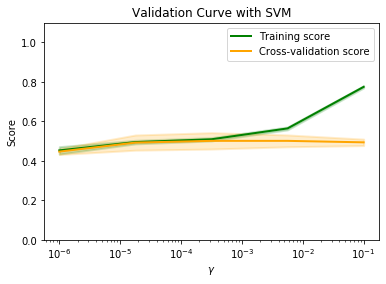

In [113]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    svm.SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="green", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="green", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="orange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="orange", lw=lw)
plt.legend(loc="best")
plt.show()

## RIDGE model

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=6)

#Standardizing data
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.transform(X_test)

ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)
ridge.predict(X_test)

accuracy = ridge.score(X_test, y_test)

print('Accuracy(%) =', accuracy*100)

Accuracy(%) = 35.6945123436023


## LASSO model

In [121]:
from sklearn.linear_model import LassoCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

#Standardizing data
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.transform(X_test)

reg = LassoCV(cv=5, random_state=0)
reg.fit(X_train, y_train)

reg.predict(X_test)

accuracy = reg.score(X_test, y_test)

print('Accuracy(%) =', accuracy*100)

Accuracy(%) = 38.0230981291116


## Essemble Bagging regression model

In [129]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)


ess_bg = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=6)
#Standardizing data
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.transform(X_test)

ess_bg.fit(X_train, y_train)
ess_bg.predict(X_test)

accuracy = ess_bg.score(X_test, y_test)
print('Accuracy(%) =', accuracy*100)

Accuracy(%) = 43.31167101502621


## Random forest regression model

In [130]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=30)

rf_reg = RandomForestRegressor(n_estimators=10, max_depth=None, random_state=6)

#Standardizing data
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.transform(X_test)

rf_reg.fit(X_train, y_train)

rf_reg.predict(X_test)

accuracy = rf_reg.score(X_test, y_test)
print('Accuracy(%) =', accuracy*100)

Accuracy(%) = 44.39857134209094


To draw the graphic (training against test):

In [131]:
def grafica(model, X_train,y_train,X_test,y_test):
    train_score =  []
    test_score = []
    max_depth_list = list(range(1, 30))

    for deep in max_depth_list:
        model = model
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

    # using validation curve of sklearn
    train_score, test_score = validation_curve(estimator=model, X=X_train,
                                            y=y_train, param_name='max_depth',
                                            param_range=max_depth_list, cv=5)

    train_mean = np.mean(train_score, axis=1)
    train_std = np.std(train_score, axis=1)
    test_mean = np.mean(test_score, axis=1)
    test_std = np.std(test_score, axis=1)

    plt.plot(max_depth_list, train_mean, color='r', marker='o', markersize=4,
             label='training')
    plt.fill_between(max_depth_list, train_mean + train_std, 
                     train_mean - train_std, alpha=0.2, color='r')
    plt.plot(max_depth_list, test_mean, color='g', 
             marker='o', markersize=4, label='test')
    plt.fill_between(max_depth_list, test_mean + test_std, 
                     test_mean - test_std, alpha=0.2, color='g')
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('Node Quantity')
    plt.ylabel('Precision')
    plt.show()

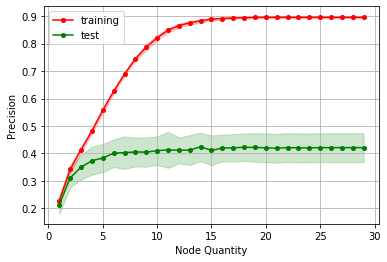

In [132]:
grafica(rf_reg, X_train,y_train,X_test,y_test)

## Decision tree regression model

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

#Standardizing data
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.transform(X_test)

dt_reg = DecisionTreeRegressor(max_depth=2)

dt_reg.fit(X_train, y_train)
dt_reg_predict = dt_reg.predict(X_test)

scores = cross_val_score(dt_reg, X_test, y_test)
print('Accuracy(%) :',scores.mean()*100) 

Accuracy(%) : 10.002823324030697


In [139]:
def grafica(model, X_train,y_train,X_test,y_test):
    train_score =  []
    test_score = []
    max_depth_list = list(range(1, 30))

    for deep in max_depth_list:
        model = model
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

    # using validation curve of sklearn
    train_score, test_score = validation_curve(estimator=model, X=X_train,
                                            y=y_train, param_name='max_depth',
                                            param_range=max_depth_list, cv=5)

    train_mean = np.mean(train_score, axis=1)
    train_std = np.std(train_score, axis=1)
    test_mean = np.mean(test_score, axis=1)
    test_std = np.std(test_score, axis=1)

    plt.plot(max_depth_list, train_mean, color='b', marker='o', markersize=4,
             label='training')
    plt.fill_between(max_depth_list, train_mean + train_std, 
                     train_mean - train_std, alpha=0.2, color='b')
    plt.plot(max_depth_list, test_mean, color='g', 
             marker='o', markersize=4, label='test')
    plt.fill_between(max_depth_list, test_mean + test_std, 
                     test_mean - test_std, alpha=0.2, color='g')
    plt.grid()
    plt.legend(loc='best')
    plt.xlabel('Node Quantity')
    plt.ylabel('Precision')
    plt.show()

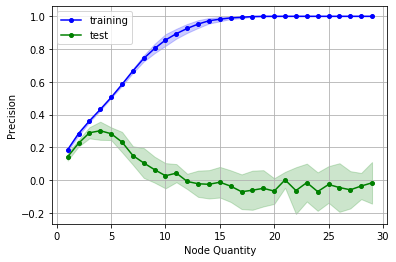

In [140]:
grafica(dt_reg, X_train,y_train,X_test,y_test)

 ## Conclusion
Regression models are definitely not the best option for this data set and this application, since classifier models are capable of giving a better prediction.